In [1]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt

#from google.colab import drive 
# #구글 드라이브 연결 라이브러리

In [ ]:
#frive.mount('/content/drive')
# #구글 드라이브 연결

In [2]:
torch.manual_seed(777)
IMAGE_SIZE=128 #이미지 크기 통일

device='cuda' if torch.cuda.is_available() else 'cpu'
if device=='cuda':
  torch.cuda.manual_seed_all(777)

In [3]:
original_datasets=ImageFolder(root='flower_photos/',
                              transform=transforms.Compose([
                                transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                transforms.ToTensor()
                              ]))

In [4]:
print(original_datasets)

Dataset ImageFolder
    Number of datapoints: 2313
    Root location: flower_photos/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [8]:
original_loader=DataLoader(original_datasets,
                           batch_size=2313,
                           shuffle=True,
                           drop_last=False,
                           num_workers=1) # 데이터 로시드 사용할 병렬 프로세스 수, 단일 프로세스 사용

In [9]:
for X, Y in original_loader:
    print(X.size(), Y.size())
    print(Y)
    break

torch.Size([2313, 3, 128, 128]) torch.Size([2313])
tensor([4, 2, 1,  ..., 2, 1, 0])


In [10]:
# 이미지 로더로 부터 이미지와 label을 추출
#total_batch=len(original_loader)
#print(total_batch)
#for i in range(total_batch):
original_images, labels=next(iter(original_loader)) 
#loader로부터 원래의 이미지로부터 새로운 이미지와 레이블 추출
print(original_images.shape)
print(labels.shape)

torch.Size([2313, 3, 128, 128])
torch.Size([2313])


In [11]:
print(labels[:10])

tensor([0, 0, 1, 1, 3, 2, 0, 2, 2, 1])


In [12]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#import matplotlib.pyplot as plt

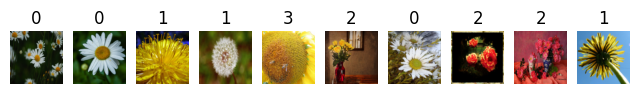

In [13]:
plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(labels[i].item())
    plt.imshow(original_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [14]:
X1=original_images #3,128,128 : 채널, 행, 열
Y1=labels
print(X1.size(), Y1.size())

torch.Size([2313, 3, 128, 128]) torch.Size([2313])


In [15]:
Image_transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

In [16]:
transforms_datasets=ImageFolder(root='flower_photos/',
                                transform=Image_transform)
transforms_loader=DataLoader(transforms_datasets,
                             batch_size=1000, 
                             shuffle=True,
                             num_workers=1)

In [17]:
transforms_images, transforms_labels=next(iter(transforms_loader))


In [18]:
print(transforms_images.size(), transforms_labels.size())
X2=torch.cat([X1, transforms_images], dim=0)
Y2=torch.cat([Y1, transforms_labels],dim=0)
print(X2.size(), Y2.size())

torch.Size([1000, 3, 128, 128]) torch.Size([1000])
torch.Size([3313, 3, 128, 128]) torch.Size([3313])


In [19]:
none_datasets=ImageFolder(root='flower_photos/',
                                transform=transforms.Compose([
                                  transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                  transforms.ToTensor()
                                  ]))
none_loader=DataLoader(none_datasets,
                             batch_size=100, 
                             shuffle=False,
                             num_workers=1)

In [20]:
none_images, none_labels=next(iter(none_loader))


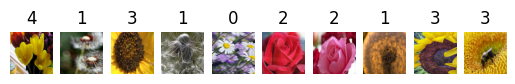

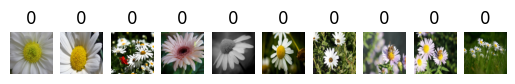

In [21]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(transforms_labels[i].item())
    plt.imshow(transforms_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(none_labels[i].item())
    plt.imshow(none_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [22]:
def create_loader(transform):
    transforms_datasets=ImageFolder(root='flower_photos',
                                    transform=transform)
    transform_loader=DataLoader(transforms_datasets,
                                batch_size=1000,
                                shuffle=True,
                                num_workers=1)
    
    transform_images, labels=next(iter(transform_loader))
    return transform_images, labels

In [23]:
Image_transform=transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ColorJitter(brightness=(0.7,0.9),
                           contrast=(1,1),
                           saturation=(0.7,0.9),
                           #hue=(-0.2,0.2)
                        ),
    transforms.ToTensor()                          
])
color_tf_images, color_tf_labels=create_loader(Image_transform)

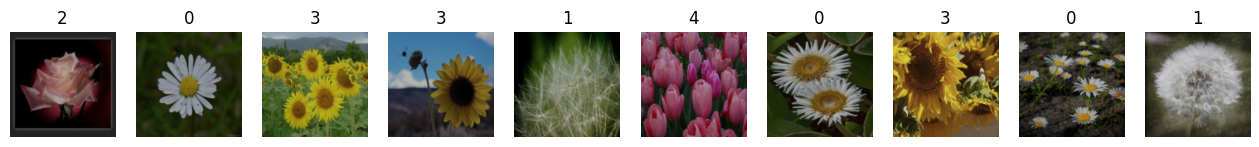

In [24]:
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(color_tf_labels[i].item())
    plt.imshow(color_tf_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [25]:
X3=torch.cat([X2, color_tf_images], dim=0)
Y3=torch.cat([Y2, color_tf_labels], dim=0)
print(X3.size(), Y3.size())

torch.Size([4313, 3, 128, 128]) torch.Size([4313])


In [26]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    # RandomHorizontalFlip 적용
    transforms.RandomHorizontalFlip(p=0.8),  # 수평 뒤집기
    transforms.ToTensor()
])
flip_tf_images, flip_tf_labels=create_loader(image_transform)
X4=torch.cat([X3, flip_tf_images], dim=0)
Y4=torch.cat([Y3, flip_tf_labels],dim=0)
print(X4.size(), Y4.size())

torch.Size([5313, 3, 128, 128]) torch.Size([5313])


In [27]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    # RandomRotation 적용
    transforms.RandomRotation(degrees=(-15, 15),
        interpolation=transforms.InterpolationMode.BILINEAR, fill=0),
    transforms.ToTensor()
])

rot_tf_images, rot_tf_labels=create_loader(image_transform)
X5=torch.cat([X4, rot_tf_images], dim=0)
Y5=torch.cat([Y4, rot_tf_labels], dim=0)
print(X5.size(), Y5.size())

torch.Size([6313, 3, 128, 128]) torch.Size([6313])


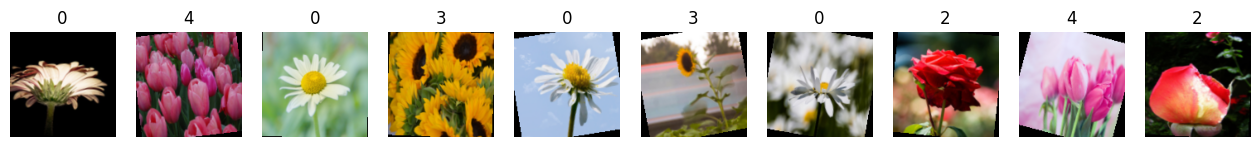

In [28]:
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(rot_tf_labels[i].item())
    plt.imshow(rot_tf_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [29]:
# image_transform = transforms.Compose([
#     transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
#     # GaussianBlur 적용
#     transforms.GaussianBlur(kernel_size=(3, 3), sigma=(1.0, 2.0)),
#     transforms.ToTensor()
# ])

# GB_tf_images, GB_tf_labels=create_loader(image_transform)
# X6=torch.cat([X5, GB_tf_images], dim=0)
# Y6=torch.cat([Y5, GB_tf_labels], dim=0)
# print(X5.size(), Y5.size())

In [30]:
# image_transform = transforms.Compose([
#     transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
#     # RandomAdjustSharpness 적용
#     transforms.RandomAdjustSharpness(sharpness_factor=0.5, p=0.9),
#     transforms.ToTensor()
# ])

# sp_tf_images, sp_tf_labels=create_loader(image_transform)
# X7=torch.cat([X6, sp_tf_images], dim=0)
# Y7=torch.cat([Y6, sp_tf_labels], dim=0)
# print(X6.size(), Y6.size())

In [31]:
cnt0=(Y5==0).sum()
cnt1=(Y5==1).sum()
cnt2=(Y5==2).sum()
cnt3=(Y5==3).sum()
cnt4=(Y5==4).sum()
print(cnt0, cnt1, cnt2, cnt3, cnt4)


tensor(1107) tensor(1528) tensor(1200) tensor(1399) tensor(1079)


In [32]:
X=X5
Y=Y5
ratios=[0.8,0.2]
print(Y.size())
train_cnt=int(Y.size(0)*ratios[0])
test_cnt=int(Y.size(0)*ratios[1])
cnts=[train_cnt, test_cnt]
print(train_cnt, test_cnt)

torch.Size([6313])
5050 1262


In [33]:
indices=torch.randperm(X.size(0))
print(indices[:10])

tensor([4575, 2678, 2555, 1855, 1015, 4355, 3210, 3261, 4659, 1912])


In [34]:
x=torch.index_select(X, dim=0, index=indices)
y=torch.index_select(Y, dim=0, index=indices)
x_train=x[:cnts[0]]
x_test=x[cnts[0]:]
y_train=y[:cnts[0]]
y_test=y[cnts[0]:]

print(x_train.size(), y_train.size())
print(x_test.size(), y_test.size())

torch.Size([5050, 3, 128, 128]) torch.Size([5050])
torch.Size([1263, 3, 128, 128]) torch.Size([1263])


In [35]:
# 데이터 만들기 end

In [36]:
#모델 작성

In [37]:
train_dataset=TensorDataset(x_train, y_train)
test_dataset=TensorDataset(x_test, y_test)

In [38]:
train_loader=DataLoader(train_dataset,
                        batch_size=100,
                        shuffle=True,
                        drop_last=False)
test_loader=DataLoader(test_dataset)

In [40]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        # 입력(3, 128, 128)
        self.conv1=nn.Conv2d( #3, 128,128
            in_channels=3,
            out_channels=8,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv2=nn.Conv2d( #8, 64,64
            in_channels=8,
            out_channels=16,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv3=nn.Conv2d( #16, 32,32
            in_channels=16,
            out_channels=32,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv4=nn.Conv2d( #32, 16,16
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv5=nn.Conv2d( #64, 8,8
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1=nn.Linear(128*4*4, 128)
        self.fc2=nn.Linear(128,64)
        self.fc3=nn.Linear(64,5)
    
    def forward(self, x): #(3,128,128)
        x=self.conv1(x)
        x=torch.relu(x)
        x=self.pool(x) #(8,64,64)
        x=self.conv2(x)
        x=torch.relu(x)
        x=self.pool(x) #(16,32,32)
        x=self.conv3(x)
        x=torch.relu(x)
        x=self.pool(x) #(32,16,16)
        x=self.conv4(x)
        x=torch.relu(x)
        x=self.pool(x) #(64,8,8)
        x=self.conv5(x)
        x=torch.relu(x)
        x=self.pool(x) #(128,4,4)

        x=x.view(-1, 4*4*128)
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        x=torch.softmax(x, dim=1)
        return x